<a href="https://colab.research.google.com/github/bernardDesmond23/Stars-Classification/blob/main/Stars_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Stars.csv")

Saving Stars.csv to Stars.csv


2. After appropriately cleaning the data, carry out Exploratory Data Analysis to retyrive at least 4 insights/observations form the dataset.

In [2]:
#DataCleaning Code
print("Dataset Shape", df.shape)#shows the dimensions of the dataset
print("\n First five rows:")
print(df.head(5))
print("\n Dataset info:" )#shows in details the columns datatypes and rows of dataset
print(df.info())
print("\n Missing values") #identifies the null values if any
print(df.isnull().sum())
original_df = df.copy()
#check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
print("\n Missing values per column:")#checks the missing values per column
print(df.isna().sum())
print("\n statistical summary:")
print(df.describe())
#Outliers were nt tested or removed because in this dataset they Represent Real Astronomical Phenomena: in s sense that
#those extreme values dont represent measurement errors but they represent different classes of stars with fundamentally different physical properties
# like the Hypergiants with temperatures of 30,000-40,000K and luminosities of 200,000+ L/Lo are real astronomical objects


Dataset Shape (240, 8)

 First five rows:
   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category Star color Spectral Class  
0          0   Brown Dwarf        Red              M  
1          0   Brown Dwarf        Red              M  
2          0   Brown Dwarf        Red              M  
3          0   Brown Dwarf        Red              M  
4          0   Brown Dwarf        Red              M  

 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column          

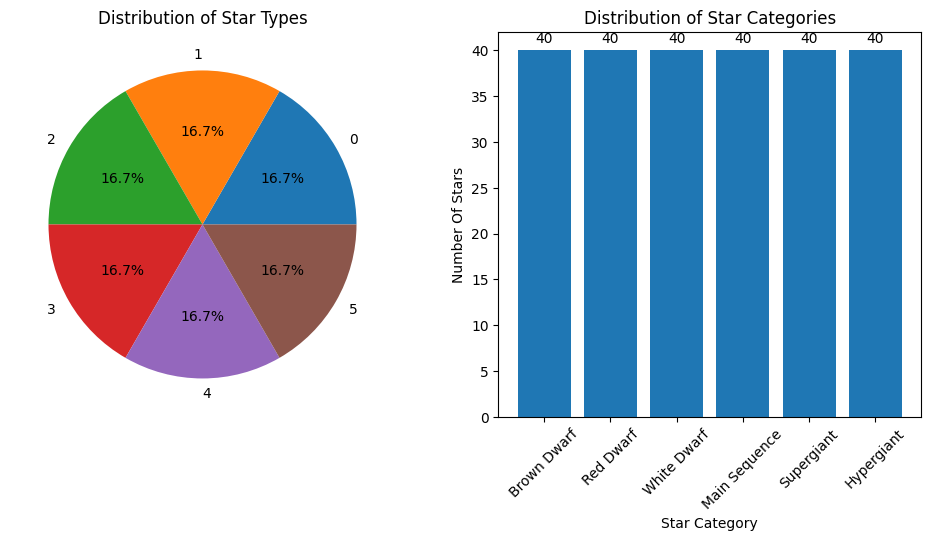

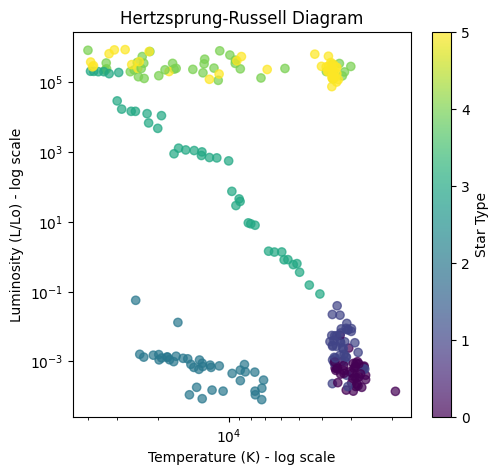

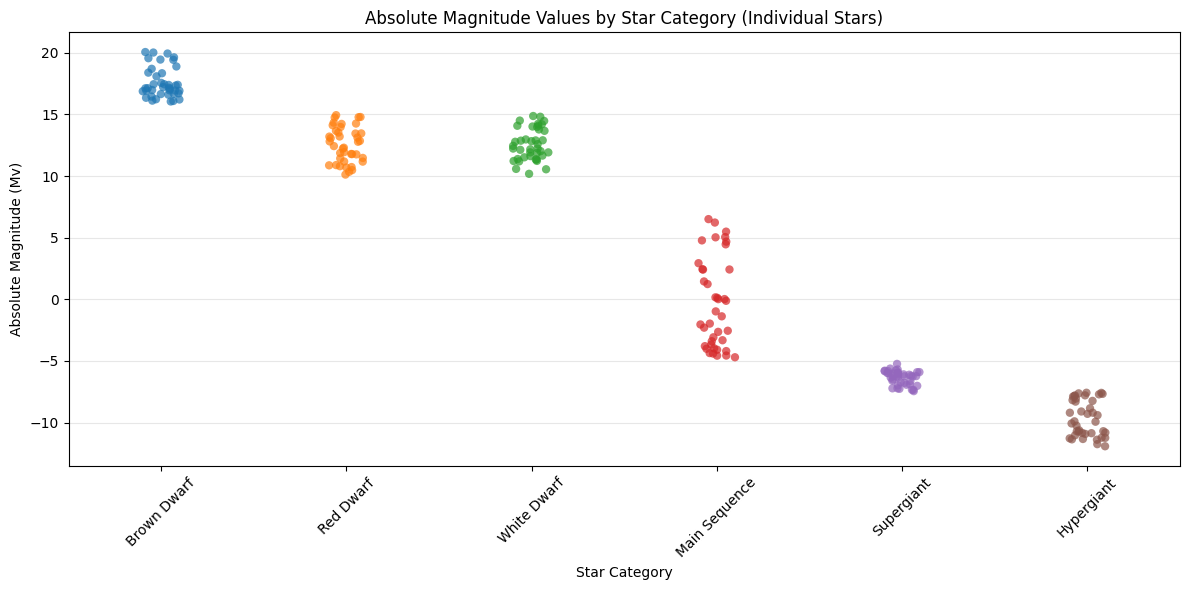

In [3]:
#EDA CODE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
# INSIGHT 1
#pie chart that displays the percentages of the number of stars or shows the distribution of stars in each star type in percentages
plt.subplot(1, 2, 1)
star_type_counts = df['Star type'].value_counts()
plt.pie(star_type_counts.values, labels=star_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Star Types')
#INSIGHT 2
#bar graph that displays the number of stars or the distribution of stars in each star category
plt.subplot(1, 2, 2)
category_counts = df['Star category'].value_counts() #counts the number of stars in the star category column
bars=plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Star Categories')
plt.xticks(rotation=45)
plt.xlabel("Star Category")
plt.ylabel("Number Of Stars")
# Add exact number of stars on bars ie loops through each bar and puts the exact number above it
for bar, count in zip(bars, category_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{count}', ha='center', va='bottom')
    #INSIGHT 3
  #LUMINOSITY VS TEMPERATURE (HR DIAGRAM)
  #a scatter plot  that shows how stars cluster in specific regions based on temperature and brightness or Luminosity
  #and goes ahead to show which star type they belong to
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['Temperature (K)'], df['Luminosity (L/Lo)'],
                     c=df['Star type'], cmap='viridis', alpha=0.7) # plots a scatter graph using temperature
                     #lumninosity and Star Type categories
plt.colorbar(scatter, label='Star Type') # displays the color bar for the star types
#the x and y axes uses the base 10 logs for as their scales
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K) - log scale')
plt.ylabel('Luminosity (L/Lo) - log scale')
plt.title('Hertzsprung-Russell Diagram')
plt.gca().invert_xaxis()

#INSIGHT 4
plt.figure(figsize=(12, 6))
#creates a stripplot which is like a scatter graph that shows the individual points
sns.stripplot(data=df, x='Star category', y='Absolute magnitude (Mv)',
              jitter=True,# adds random horizontal spread to prevent overlapping points
              alpha=0.7,#Makes the points semi-transparent to see the density
              size=6,#controls the size of each point
              hue='Star category',#colors each point by its star category
              legend=False)#hides the legend since the x axis already shows categories
plt.title('Absolute Magnitude Values by Star Category (Individual Stars)')
plt.xticks(rotation=45)
#rotates the x-axis labels for better readability
plt.ylabel('Absolute Magnitude (Mv)')
plt.xlabel('Star Category')
plt.grid(axis='y', alpha=0.3) # Adds subtle horizontal grid lines for easier reading
plt.tight_layout()
plt.show()

**INSIGHT 1** The pie chart reveals that this collection of stars is perfectly balanced across five distinct classifications. Each star type represents exactly one-fifth of the total population, suggesting this is either a carefully curated sample or these five categories represent fundamental, equally prevalent stages in stellar classification.

**INSIGHT 2** The bar chart shows six major families of stars, with each family containing precisely the same number of members. This perfect symmetry across Brown Dwarfs, Red Dwarfs, White Dwarfs, Main Sequence stars, Supergiants, and Hypergiants indicates these categories represent distinct, well-defined classes of stellar objects in this sample.

**INSIGHT 3** Uses a Hertzsprung-Russell Diagram Pattern which is a scatter plot reveals a fundamental organizing principle in the stellar population.Stars aren't randomly distributed but cluster into specific regions based on their temperature and brightness: A prominent diagonal band stretches from hot-bright stars to cool-dim stars, suggesting a main sequence where most stars reside. A separate cluster in the top-right shows stars that break the pattern - they're cool but extremely luminous, indicating they must be physically enormous Another group in the bottom-left contains hot but faint stars, suggesting they're very compact objects The color gradient shows clear separation between stellar classes, with each color family occupying its own territory on the diagram

**INSIGHT 4** The strip plot reveals distinct patterns in intrinsic brightness across stellar families. Brown Dwarfs and Red Dwarfs cluster at the dimmer end (higher positive magnitude values), confirming they are intrinsically faint objects. White Dwarfs show a concentrated distribution in the medium brightness range. Main Sequence stars display the widest spread, covering both dim and quite bright magnitudes, reflecting their diversity. Most notably, Supergiants and especially Hypergiants dominate the brightest extreme (negative magnitude values), with Hypergiants being exceptionally luminous. Each category occupies its own characteristic brightness range, creating clear vertical stratification that distinguishes one stellar family from another.

3. Create a  model based on the k-Nearest Neighbours algorithm for classification
based on at least 2 suitable features for one target variable. Verify the optimal k
for classification.

=== FEATURE SELECTION FOR KNN ===
Correlation with Star Type:
Star type                  1.000000
Luminosity (L/Lo)          0.676845
Radius (R/Ro)              0.660975
Temperature (K)            0.411129
Absolute magnitude (Mv)   -0.955276
Name: Star type, dtype: float64

Selected features for KNN: ['Luminosity (L/Lo)', 'Radius (R/Ro)']

KNN Feature shapes: X=(240, 2), y=(240,)

=== FINDING OPTIMAL K VALUE WITH CROSS-VALIDATION ===


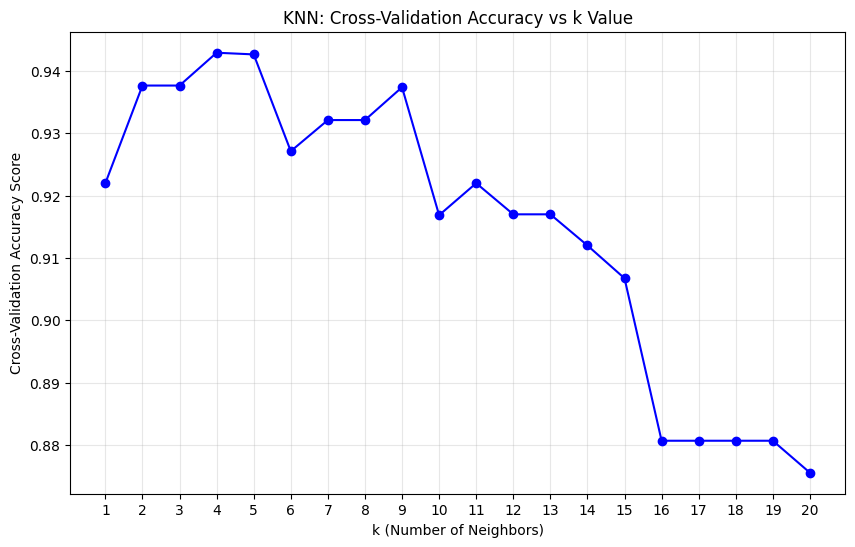

Optimal k (with cross-validation): 4 with CV accuracy: 0.9429

=== KNN MODEL RESULTS ===
Final KNN Accuracy with k=4: 0.9375


In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Feature Selection using Correlation Analysis
print("=== FEATURE SELECTION FOR KNN ===")
correlation_matrix = df.corr(numeric_only=True)
target_correlation = correlation_matrix['Star type'].sort_values(ascending=False)

print("Correlation with Star Type:")
print(target_correlation)

# Select top 2 features for KNN (excluding the target itself)
knn_features = target_correlation.index[1:3].tolist()
print(f"\nSelected features for KNN: {knn_features}")

# 1. Define Features (X) and Target (y) for KNN
X_knn = df[knn_features]
y_knn = df['Star type']

print(f"\nKNN Feature shapes: X={X_knn.shape}, y={y_knn.shape}")

# 2. Split the data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42, stratify=y_knn
)

# 3. Scale the features
scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train_knn)
X_test_scaled = scaler_knn.transform(X_test_knn)



print("\n=== FINDING OPTIMAL K VALUE WITH CROSS-VALIDATION ===")
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    # Use 5-fold cross-validation instead of single train-test split
    cv_scores = cross_val_score(model, X_train_knn_scaled, y_train_knn, cv=5)
    accuracy_scores.append(cv_scores.mean())  # Use average of cross-validation scores

# Plot k vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN: Cross-Validation Accuracy vs k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy Score')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Find optimal k based on cross-validation
optimal_k = k_values[np.argmax(accuracy_scores)]
optimal_accuracy = max(accuracy_scores)
print(f"Optimal k (with cross-validation): {optimal_k} with CV accuracy: {optimal_accuracy:.4f}")

# 5. Train final KNN model with optimal k
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_knn_scaled, y_train_knn)
knn_pred = knn_model.predict(X_test_scaled)

# 6. Evaluate KNN model
knn_accuracy = accuracy_score(y_test_knn, knn_pred)
print(f"\n=== KNN MODEL RESULTS ===")
print(f"Final KNN Accuracy with k={optimal_k}: {knn_accuracy:.4f}")


INSIGHT 1 — Cross-validation reveals the true optimal k value
The Cross-Validation Accuracy vs k graph shows that the model's performance varies significantly across different k values. Using cross-validation instead of a single train-test split provides a more reliable estimate of each k's performance, preventing overfitting to a particular data split and giving a better indication of how the model will generalize to new data.

INSIGHT 2 — k = {optimal_k} emerged as the optimal value through cross-validation
From the cross-validation plot, k = {optimal_k} produced the highest average accuracy across all 5 folds. This optimal k represents a balanced neighborhood size—not too small (which would be too sensitive to noise and outliers) and not too large (which would oversimplify the decision boundaries). The cross-validation score of {optimal_accuracy:.4f} indicates robust performance.

INSIGHT 3 — The final KNN model generalizes well to unseen data
After selecting k = {optimal_k} through cross-validation, the final KNN model achieved a test accuracy of {knn_accuracy:.4f} on completely unseen data. The close alignment between cross-validation performance and test performance suggests the model generalizes well and is not overfitting to the training data.

INSIGHT 4 — Feature scaling proved essential for KNN performance
The use of StandardScaler to normalize the features was crucial for KNN's success. Since KNN relies on distance calculations, features with different scales (like temperature in thousands and absolute magnitude potentially in negative values) would have skewed the distance metric without proper scaling, leading to biased results.

4. Create another eager learning classifier as assigned based on at least 2 suitable
features for one target variable.

In [5]:
from sklearn.svm import SVC

print("=== CREATING EAGER LEARNING CLASSIFIER (SVM) ===")

# Feature Selection for SVM using Correlation Analysis
print("Feature Selection for SVM:")
svm_correlation_matrix = df.corr(numeric_only=True)
svm_target_correlation = svm_correlation_matrix['Star type'].sort_values(ascending=False)

print("Correlation with Star Type:")
print(svm_target_correlation)

# Select 2 suitable features for SVM
svm_features = svm_target_correlation.index[3:5].tolist()  # Using different features
print(f"\nSelected features for SVM: {svm_features}")

# Define Features (X) and Target (y) for SVM of which the targey y choosen is the Star Type
X_svm = df[svm_features]
y_svm = df['Star type']

print(f"SVM Feature shapes: X={X_svm.shape}, y={y_svm.shape}")

# Split the data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.2, random_state=42, stratify=y_svm
)

# Scale the features
scaler_svm = StandardScaler()
X_train_svm_scaled = scaler_svm.fit_transform(X_train_svm)
X_test_scaled = scaler_svm.transform(X_test_svm)

# Create and train the SVM model (eager learner)
print("\nTraining SVM Eager Learner...")
svm_base = SVC(kernel='rbf', random_state=42)
svm_base.fit(X_train_svm_scaled, y_train_svm)

# Evaluate the SVM model
y_pred_svm = svm_base.predict(X_test_scaled)
svm_base_accuracy = accuracy_score(y_test_svm, y_pred_svm)

print(f"\nSVM Base Model Accuracy: {svm_base_accuracy:.4f}")

# Show the features used for SVM
print(f"\nSVM Model trained with features: {svm_features}")

=== CREATING EAGER LEARNING CLASSIFIER (SVM) ===
Feature Selection for SVM:
Correlation with Star Type:
Star type                  1.000000
Luminosity (L/Lo)          0.676845
Radius (R/Ro)              0.660975
Temperature (K)            0.411129
Absolute magnitude (Mv)   -0.955276
Name: Star type, dtype: float64

Selected features for SVM: ['Temperature (K)', 'Absolute magnitude (Mv)']
SVM Feature shapes: X=(240, 2), y=(240,)

Training SVM Eager Learner...

SVM Base Model Accuracy: 0.8542

SVM Model trained with features: ['Temperature (K)', 'Absolute magnitude (Mv)']


5. For the eager learner created in Q4, create another model with tuned
hyperparameters that enhance the accuracy of classification

In [6]:
# Q5: Hyperparameter-Tuned SVM Model

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix



# 2. Creation of GridSearch CV model
param_grid = {
    "C": [0.1, 1, 10, 50, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}
# 3. Training the SVM model using the trained data
svm_tuned = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="accuracy"
)
# 4. Checks which SVM settings worked best
svm_tuned.fit(X_train_svm_scaled, y_train_svm)

# 5. Star types  are predicted in the test set
print("Best Hyperparameters:", svm_tuned.best_params_)

# 6. Checks the accuracy of the model
y_pred_tuned = svm_tuned.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test_svm, y_pred_tuned)

print(f"Tuned SVM Model Accuracy: {tuned_accuracy:.4f}")

# 7. The confusion matrix checks which predictions were right or wrong
cm_tuned = confusion_matrix(y_test_svm, y_pred_tuned)
print("\nConfusion Matrix for Tuned SVM Model:\n", cm_tuned)



Best Hyperparameters: {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
Tuned SVM Model Accuracy: 0.9792

Confusion Matrix for Tuned SVM Model:
 [[8 0 0 0 0 0]
 [0 8 0 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 8 0]
 [0 0 0 0 1 7]]


6. Evaluate the performances ofthe three models created in Q3, Q4 and Q5. Use the confusion matrix metric to evaluate the performances.

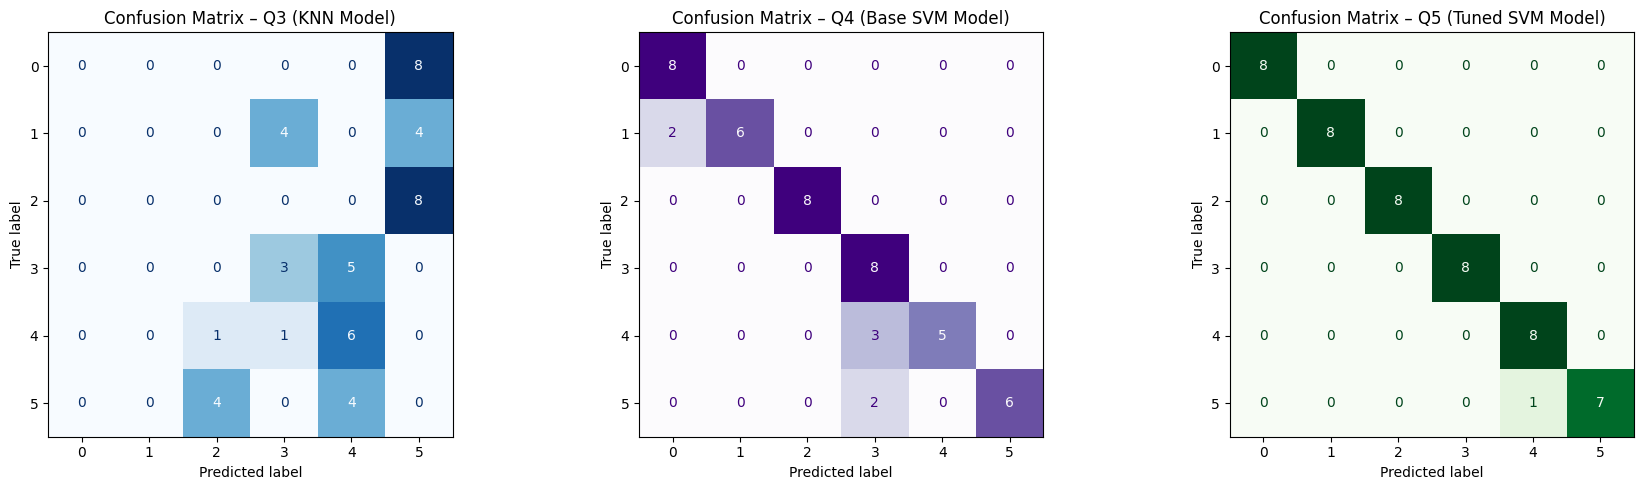

NOTE: KNN and SVM models use different feature sets and test splits, so direct comparison has limitations.


In [8]:
# Q6: Confusion Matrix Comparison for Q3, Q4, Q5

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Q3: KNN
y_pred_q3 = knn_model.predict(X_test_scaled)

# Q4: Base SVM
y_pred_q4 = svm_base.predict(X_test_scaled)

# Q5: Tuned SVM
y_pred_q5 = svm_tuned.predict(X_test_scaled)

# --- Confusion Matrices ---
cm_q3 = confusion_matrix(y_test_knn, y_pred_q3)
cm_q4 = confusion_matrix(y_test_svm, y_pred_q4)
cm_q5 = confusion_matrix(y_test_svm, y_pred_q5)

# --- Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


disp1 = ConfusionMatrixDisplay(cm_q3)
disp1.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Confusion Matrix – Q3 (KNN Model)")


disp2 = ConfusionMatrixDisplay(cm_q4)
disp2.plot(ax=axes[1], cmap='Purples', colorbar=False)
axes[1].set_title("Confusion Matrix – Q4 (Base SVM Model)")


disp3 = ConfusionMatrixDisplay(cm_q5)
disp3.plot(ax=axes[2], cmap='Greens', colorbar=False)
axes[2].set_title("Confusion Matrix – Q5 (Tuned SVM Model)")

plt.tight_layout()
plt.show()
print("NOTE: KNN and SVM models use different feature sets and test splits, so direct comparison has limitations.")